# Plots

In [2]:
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



#  Plots on real dataset

# Box plot between AUC scores Vs models for 10 and all features

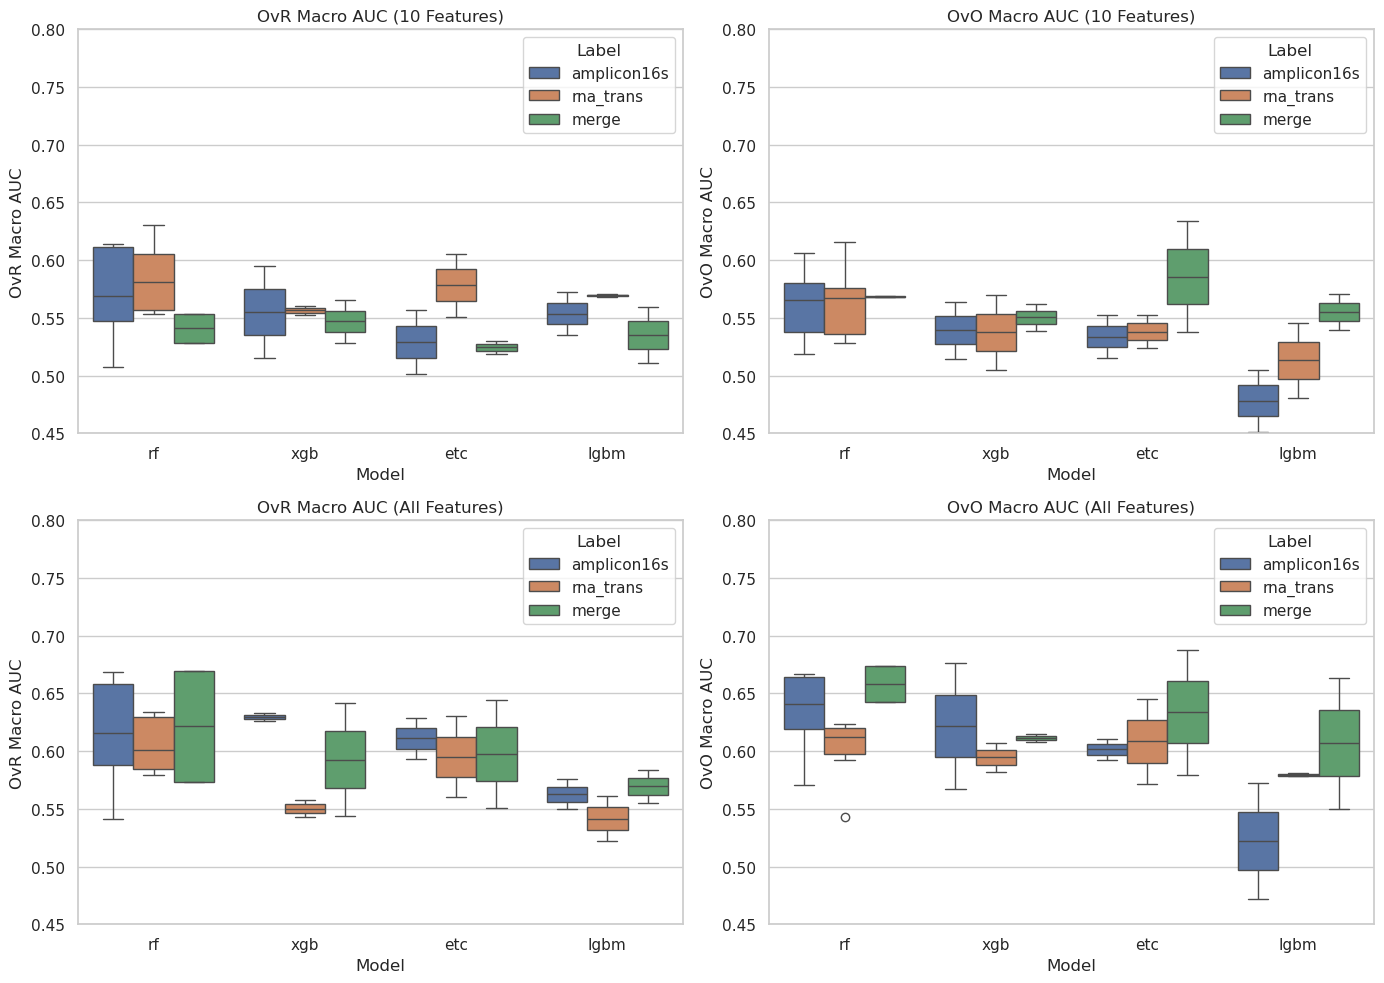

In [24]:

def plot_box(file_path,x_axis):
    
    df = pd.read_csv(file_path)
    
    # Convert "Features (k)" to numeric
    df["Features (k)"] = pd.to_numeric(df["Features (k)"], errors="coerce")
    
    # Separate data based on number of features
    df_10_features = df[df["Features (k)"] == 10]
    df_all_features = df[df["Features (k)"] != 10]  # Assuming "all features" is any value other than 10
    
    # Set up plotting style
    sns.set_theme(style="whitegrid")
    y_min = 0.45
    y_max = 0.8
    
    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Plot OvR Macro AUC for 10 features
    sns.boxplot(data=df_10_features, x=x_axis, y="OvR Macro AUC", hue="Label", ax=axes[0, 0])
    axes[0, 0].set_title("OvR Macro AUC (10 Features)")
    axes[0, 0].set_ylim(y_min, y_max)
    
    # Plot OvO Macro AUC for 10 features
    sns.boxplot(data=df_10_features, x=x_axis, y="OvO Macro AUC", hue="Label", ax=axes[0, 1])
    axes[0, 1].set_title("OvO Macro AUC (10 Features)")
    axes[0, 1].set_ylim(y_min, y_max)
    
    # Plot OvR Macro AUC for all features
    sns.boxplot(data=df_all_features, x=x_axis, y="OvR Macro AUC", hue="Label", ax=axes[1, 0])
    axes[1, 0].set_title("OvR Macro AUC (All Features)")
    axes[1, 0].set_ylim(y_min, y_max)
    
    # Plot OvO Macro AUC for all features
    sns.boxplot(data=df_all_features, x=x_axis, y="OvO Macro AUC", hue="Label", ax=axes[1, 1])
    axes[1, 1].set_title("OvO Macro AUC (All Features)")
    axes[1, 1].set_ylim(y_min, y_max)
    
    # Adjust layout and save figure
    plt.tight_layout()
    save_dir="results/plots_images"
    filepath=os.path.join(save_dir, "AUC_Comparison_10_vs_All_Features.png")
    if not os.path.exists(filepath):
        plt.savefig(filepath)
  
    
    plt.show()

plot_box("results/real.csv","Model")

# boxplot: classwise Macro AUC vs Model for 10 and all features

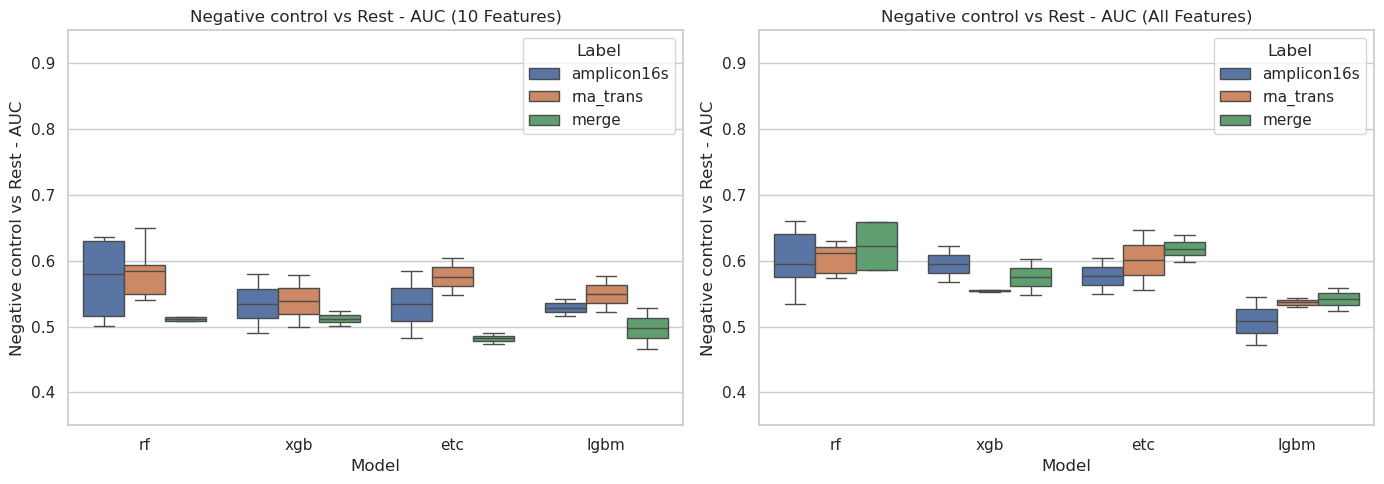

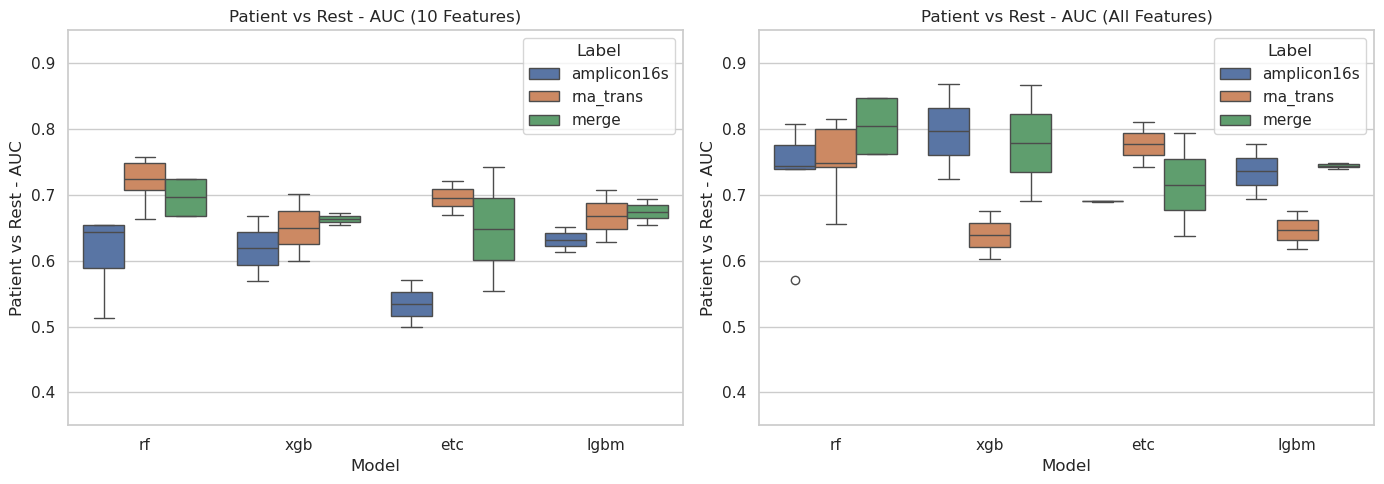

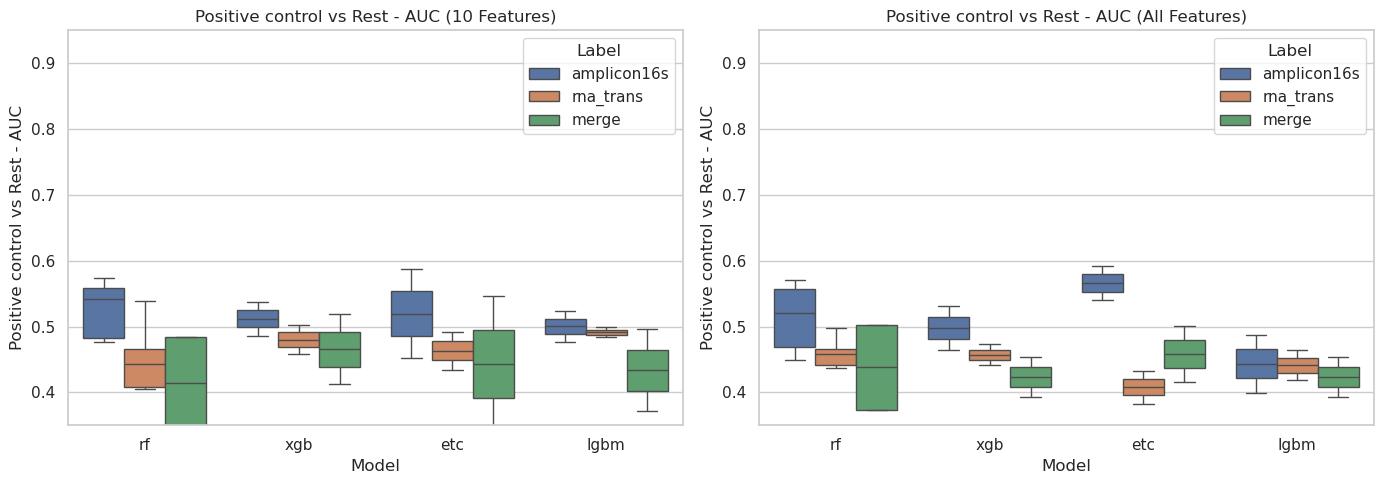

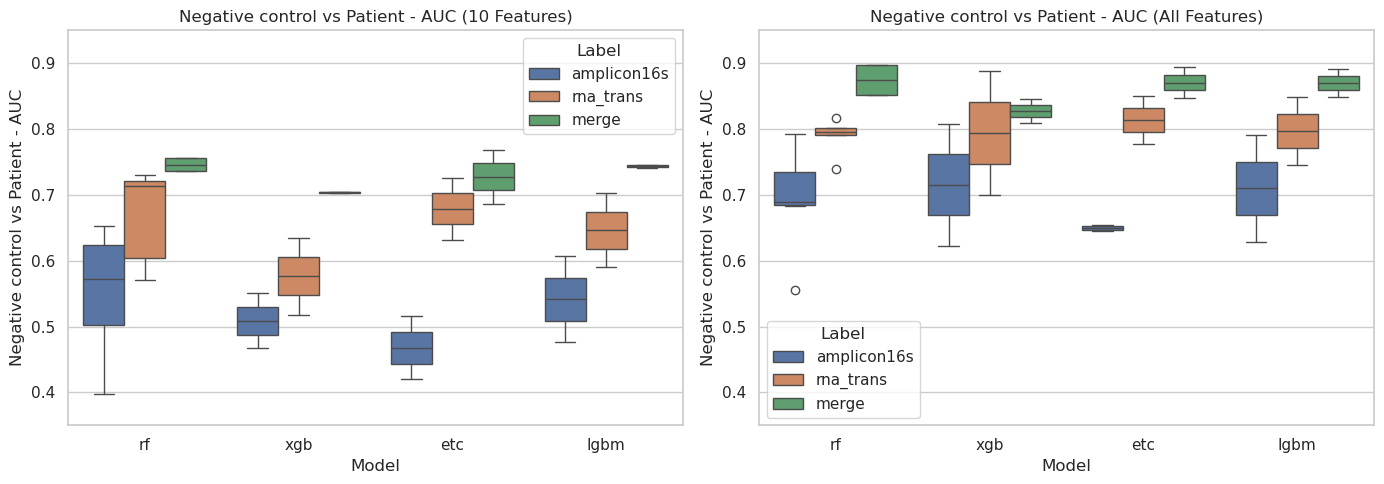

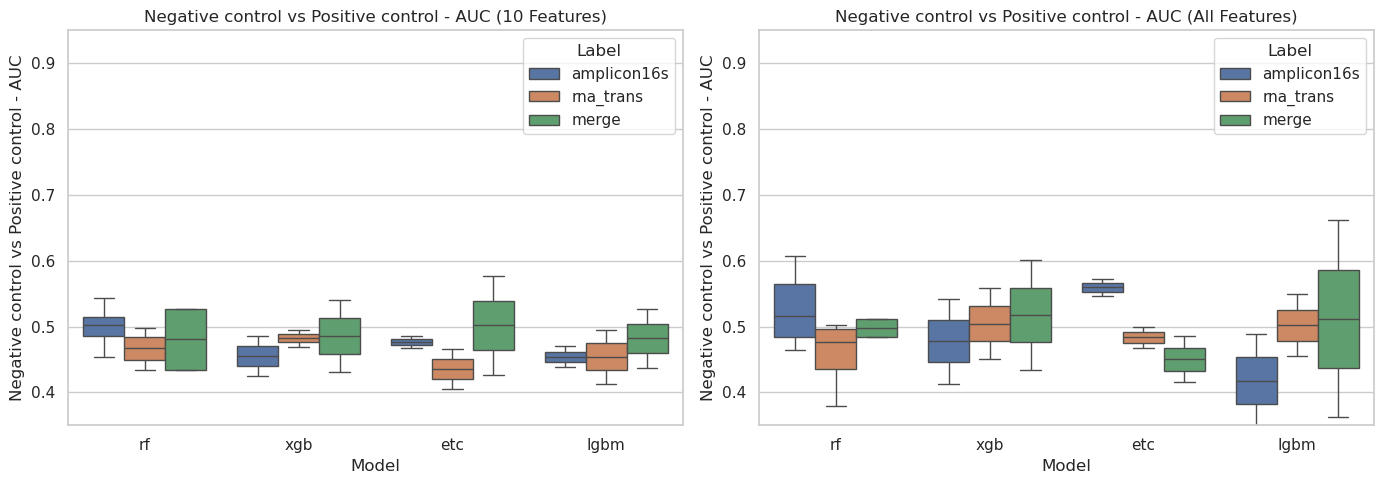

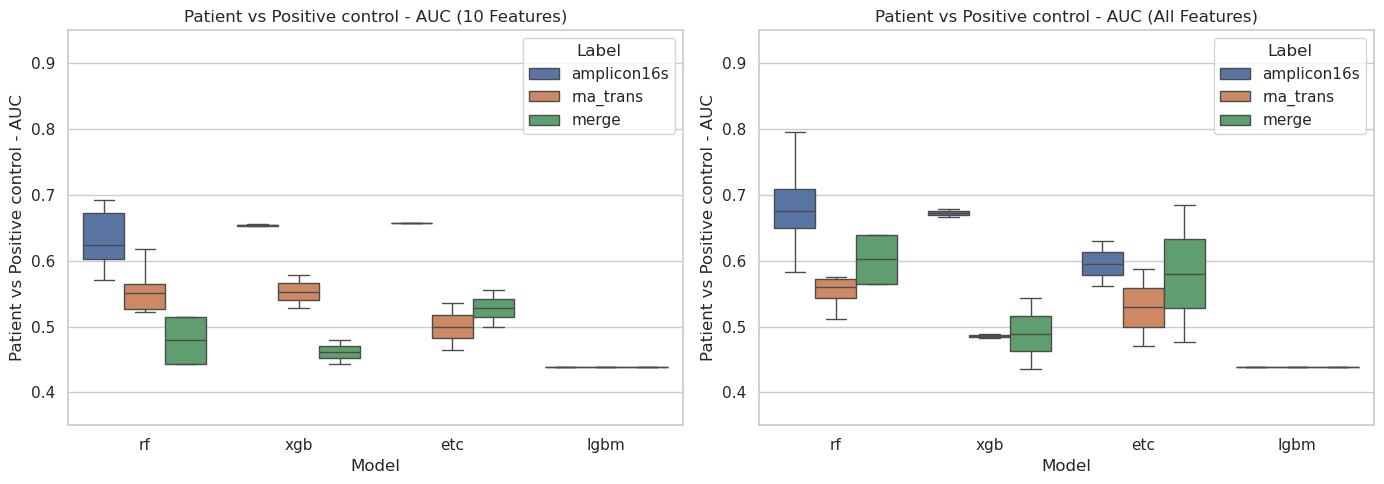

In [23]:
def classwise_auc_plot(file_path,x_axis):
    #read df
    df = pd.read_csv(file_path)
    
    # Convert "Features (k)" to numeric
    df["Features (k)"] = pd.to_numeric(df["Features (k)"], errors="coerce")
    
    # Separate data based on number of features
    df_10_features = df[df["Features (k)"] == 10]
    df_all_features = df[df["Features (k)"] != 10]  # Assuming "all features" means not 10
    
    # Define class-wise AUC columns
    class_auc_columns = [
        "Negative control vs Rest - AUC",
        "Patient vs Rest - AUC",
        "Positive control vs Rest - AUC",
        "Negative control vs Patient - AUC",
        "Negative control vs Positive control - AUC",
        "Patient vs Positive control - AUC"
    ]

    y_min=0.35
    y_max=0.95
    
    # Set up plotting style
    sns.set_theme(style="whitegrid")
    
    # --- PLOT CLASS-WISE AUCs ---
    for col in class_auc_columns:
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
        # Plot for 10 features
        sns.boxplot(data=df_10_features, x=x_axis, y=col, hue="Label", ax=axes[0])
        axes[0].set_title(f"{col} (10 Features)")
        axes[0].set_ylim(y_min, y_max)
        
        # Plot for all features
        sns.boxplot(data=df_all_features, x=x_axis, y=col, hue="Label", ax=axes[1])
        axes[1].set_title(f"{col} (All Features)")
        axes[1].set_ylim(y_min, y_max)
        
        # Adjust layout and save the figure
        plt.tight_layout()
        filename = col.replace(" ", "_").replace("-", "").replace("/", "_") + "_Comparison.png"
        
        save_dir="results/plots_images"
        filepath=os.path.join(save_dir, filename)
        if not os.path.exists(filepath):
            plt.savefig(filepath)
  
        
        plt.show()
classwise_auc_plot("results/real.csv","Model")

# bar graphs between Macro AUC vs models for 10 and all features

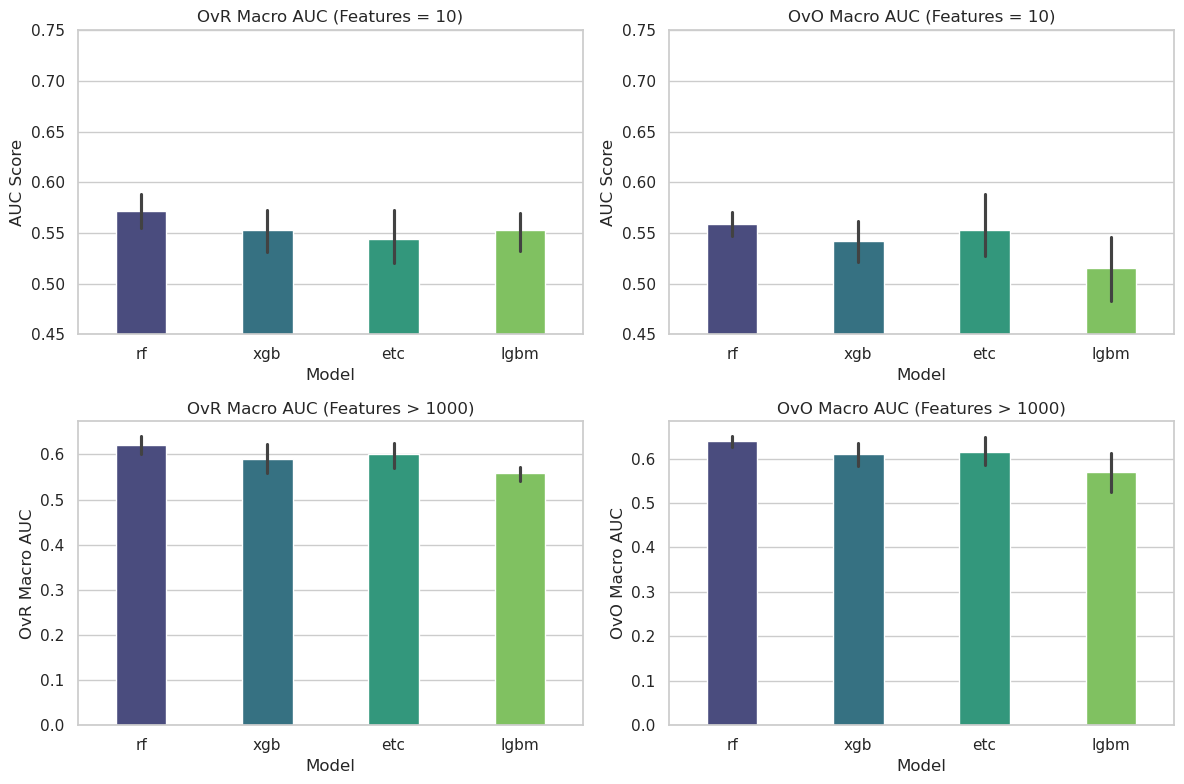

In [35]:
df = pd.read_csv("results/real.csv")

# Plot performance metrics for different feature sets
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(12, 8), gridspec_kw={'width_ratios': [1, 1]})

for idx, k in enumerate([10, 1000]):
     
    if k == 10:
        subset_df = df[df["Features (k)"] == k]  # For Features = 10
    else:
        subset_df = df[df["Features (k)"] > k]  # For Features > 1000

    # Define common y-axis range
    y_min = 0.45
    y_max = 0.75

   
    
    # OvR Macro AUC (Bar Chart)
    ax = axes[idx//2, idx%2]
    sns.barplot(x="Model", y="OvR Macro AUC", hue="Model", data=subset_df, palette="viridis", ax=axes[idx,0], width=0.4)
    axes[idx,0].set_title(f"OvR Macro AUC (Features {'=' if k == 10 else '>'} {k})")
    sns.barplot(x="Model", y="OvO Macro AUC", hue="Model", data=subset_df, palette="viridis", ax=axes[idx,1], width=0.4)
    axes[idx,1].set_title(f"OvO Macro AUC (Features {'=' if k == 10 else '>'} {k})")
    ax.set_ylim(y_min, y_max)
    ax.set_xlabel("Model")
    ax.set_ylabel("AUC Score")
    if ax.get_legend() is not None:
        ax.get_legend().remove()
plt.subplots_adjust(hspace=0.4)
save_dir="results/plots_images"
filepath=os.path.join(save_dir, "barplot_AUC_Comparison_10_vs_All_Features.png")
if not os.path.exists(filepath):
    plt.savefig(filepath)
plt.tight_layout()
plt.show()


    
  

# bar graph between  MacroAUC and Macro F1 vs sampling strategies  

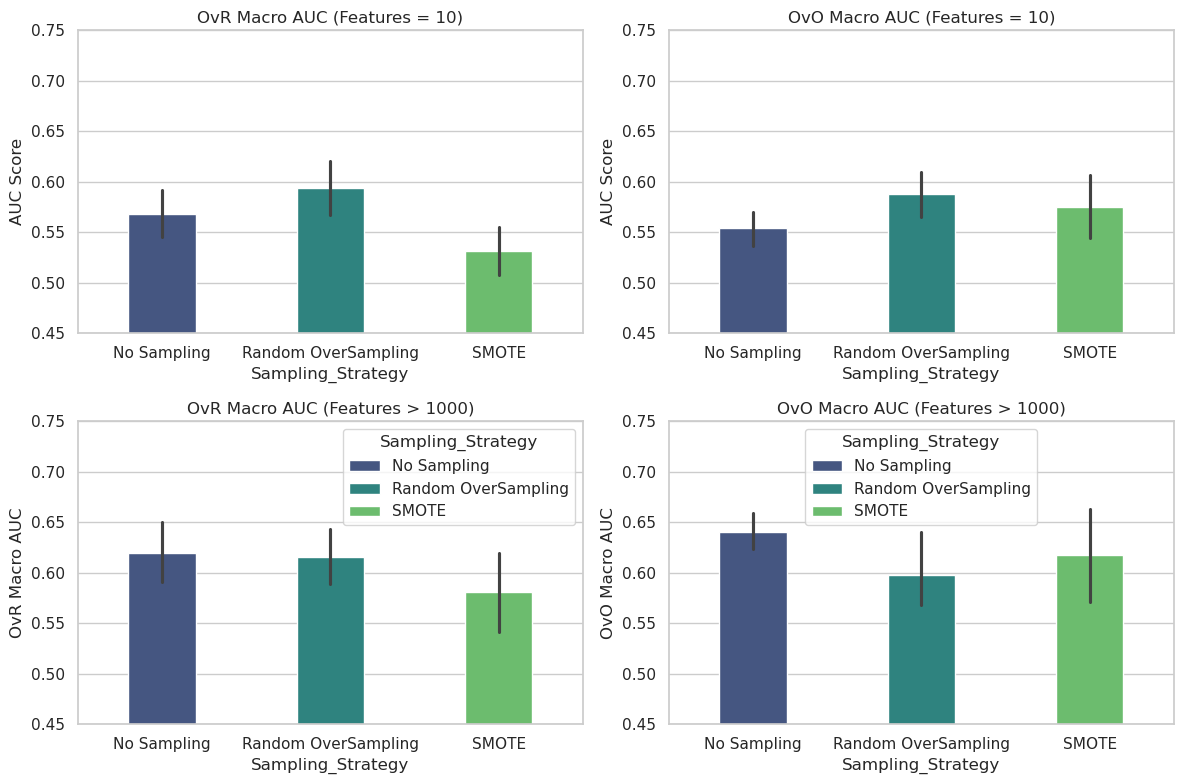

In [25]:
df = pd.read_csv("results/real.csv")

# Plot performance metrics for different feature sets
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(12, 8), gridspec_kw={'width_ratios': [1, 1]})

for idx, k in enumerate([10, 1000]):
     
    if k == 10:
        subset_df = df[df["Features (k)"] == k]  # For Features = 10
    else:
        subset_df = df[df["Features (k)"] > k]  # For Features > 1000

    # Define common y-axis range
    y_min = 0.45
    y_max = 0.75

   
    
    # OvR Macro AUC (Bar Chart)
    ax = axes[idx//2, idx%2]
    sns.barplot(x="Sampling_Strategy", y="OvR Macro AUC", hue="Sampling_Strategy", data=subset_df, palette="viridis", ax=axes[idx,0], width=0.4)
    axes[idx,0].set_title(f"OvR Macro AUC (Features {'=' if k == 10 else '>'} {k})")
    axes[idx,0].set_ylim(y_min, y_max)
    sns.barplot(x="Sampling_Strategy", y="OvO Macro AUC", hue="Sampling_Strategy", data=subset_df, palette="viridis", ax=axes[idx,1], width=0.4)
    axes[idx,1].set_title(f"OvO Macro AUC (Features {'=' if k == 10 else '>'} {k})")
    axes[idx,1].set_ylim(y_min, y_max)
    
    ax.set_xlabel("Sampling_Strategy")
    ax.set_ylabel("AUC Score")
    if ax.get_legend() is not None:
        ax.get_legend().remove()
plt.subplots_adjust(hspace=0.4)
save_dir="results/plots_images"
filepath=os.path.join(save_dir, "barplot_sampling_vs_AUC.png")
if not os.path.exists(filepath):
    plt.savefig(filepath)
plt.tight_layout()
plt.show()


    
  

# synthetic datasets

# Box plot between AUC scores Vs models for 10 and all features

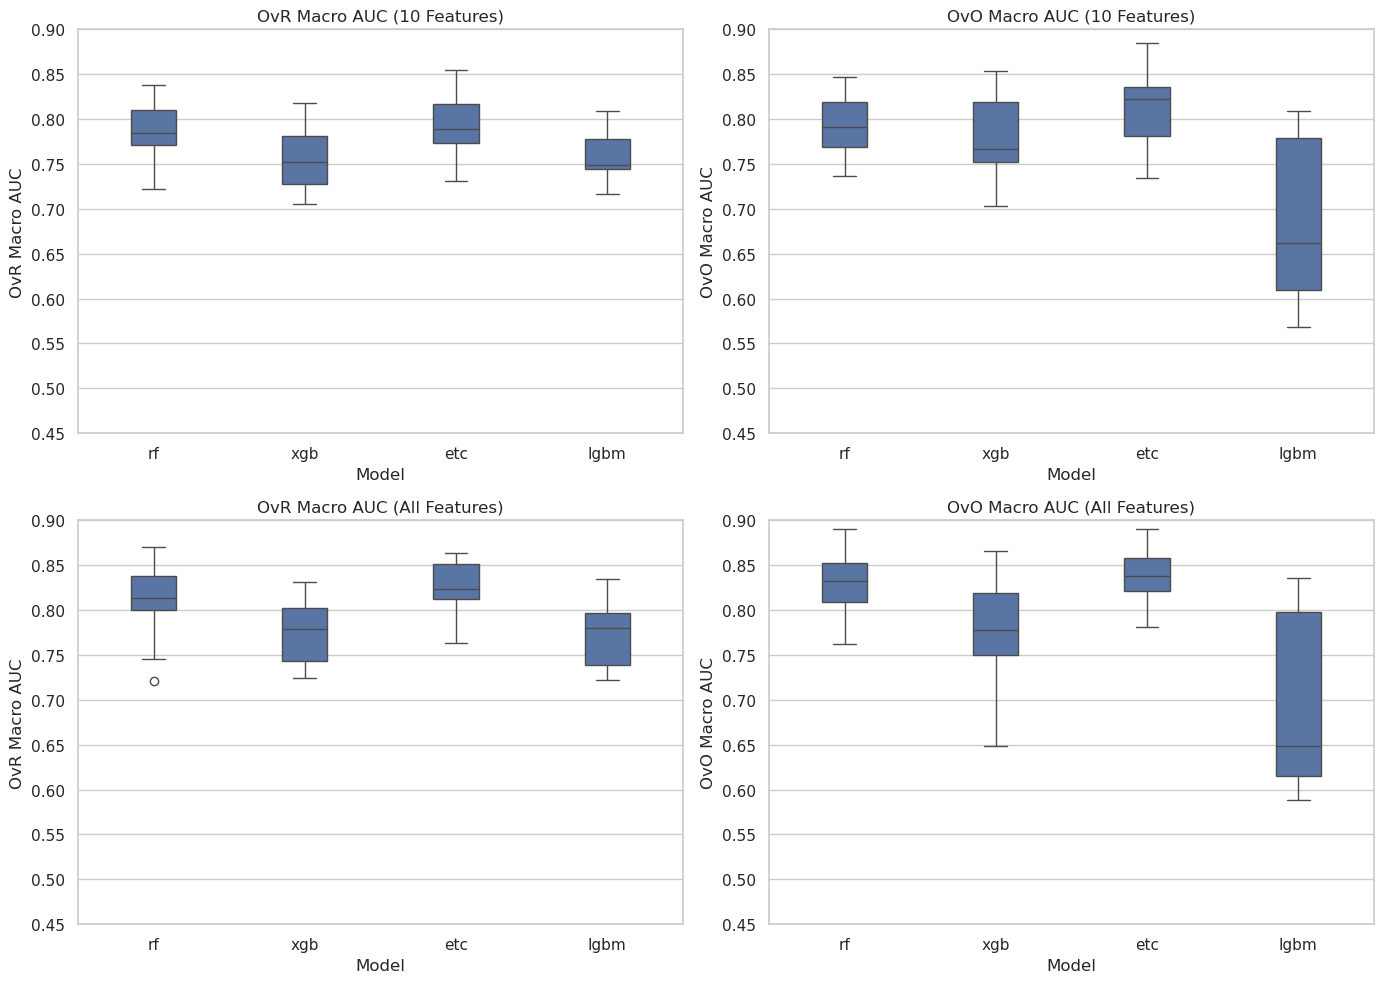

In [27]:

def plot_box(file_path,x_axis):
    
    df = pd.read_csv(file_path)
    
    # Convert "Features (k)" to numeric
    df["Features (k)"] = pd.to_numeric(df["Features (k)"], errors="coerce")
    
    # Separate data based on number of features
    df_10_features = df[df["Features (k)"] == 10]
    df_all_features = df[df["Features (k)"] != 10]  # Assuming "all features" is any value other than 10
    
    # Set up plotting style
    sns.set_theme(style="whitegrid")
    y_max=0.9
    y_min=0.45
    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Plot OvR Macro AUC for 10 features
    sns.boxplot(data=df_10_features, x=x_axis, y="OvR Macro AUC", ax=axes[0, 0], width=0.3)
    axes[0, 0].set_title("OvR Macro AUC (10 Features)")
    axes[0,0].set_ylim(y_min, y_max)
    # Plot OvO Macro AUC for 10 features
    sns.boxplot(data=df_10_features, x=x_axis, y="OvO Macro AUC", ax=axes[0, 1], width=0.3)
    axes[0, 1].set_title("OvO Macro AUC (10 Features)")
    axes[0,1].set_ylim(y_min, y_max)
    # Plot OvR Macro AUC for all features
    sns.boxplot(data=df_all_features, x=x_axis, y="OvR Macro AUC", ax=axes[1, 0], width=0.3)
    axes[1, 0].set_title("OvR Macro AUC (All Features)")
    axes[1,0].set_ylim(y_min, y_max)
    # Plot OvO Macro AUC for all features
    sns.boxplot(data=df_all_features, x=x_axis, y="OvO Macro AUC", ax=axes[1, 1], width=0.3)
    axes[1, 1].set_title("OvO Macro AUC (All Features)")
    axes[1,1].set_ylim(y_min, y_max)
    
    # Adjust layout and save figure
    plt.subplots_adjust(hspace=0.4)
    plt.tight_layout()
    save_dir="results/plots_images"
    filepath=os.path.join(save_dir, "syn_AUC_Comparison_10_vs_All_Features.png")
    if not os.path.exists(filepath):
        plt.savefig(filepath)
  
    
    plt.show()

plot_box("results/synthetic.csv","Model")

# boxplot: classwise Macro AUC vs Model for 10 and all features

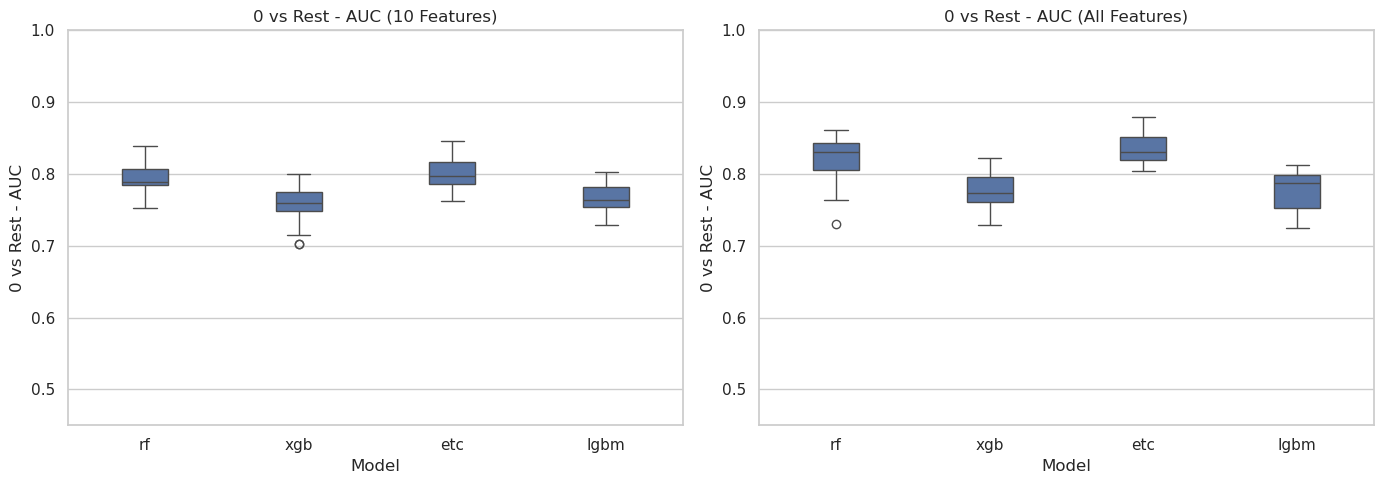

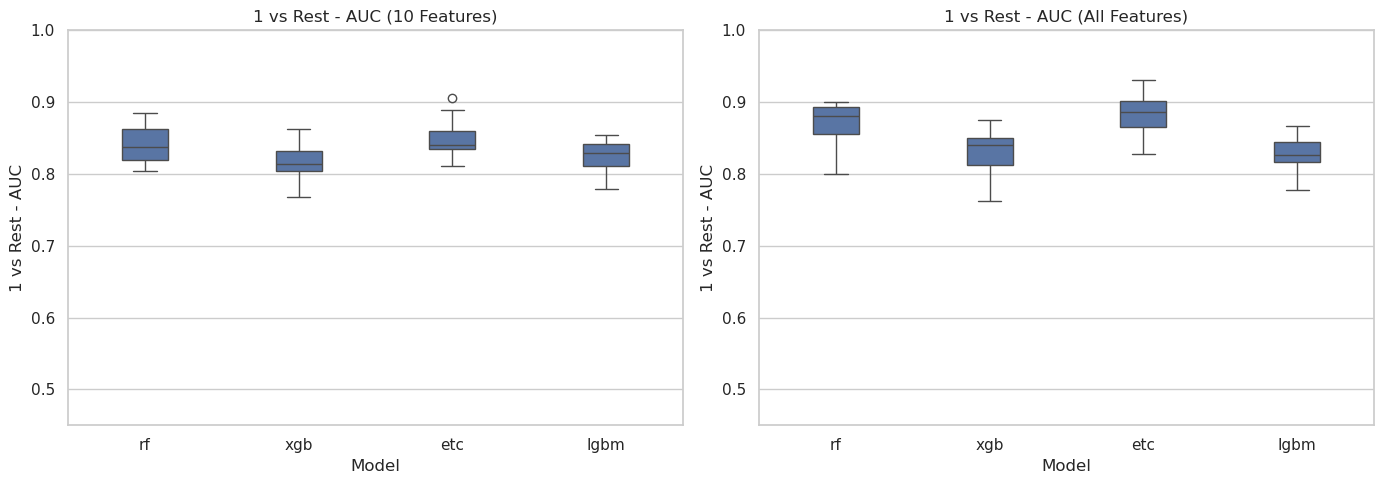

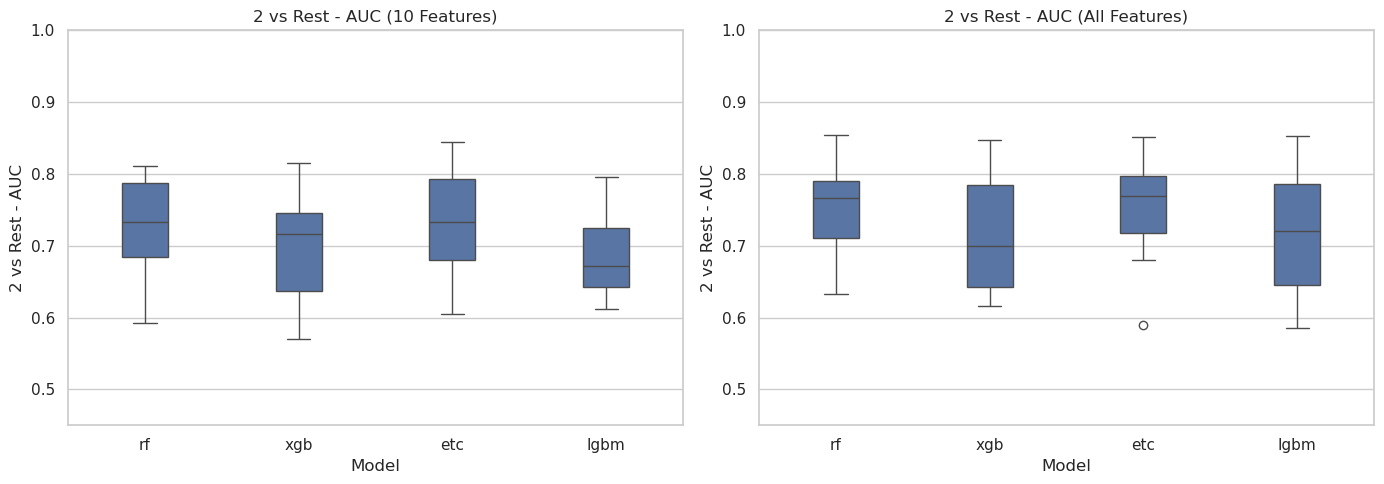

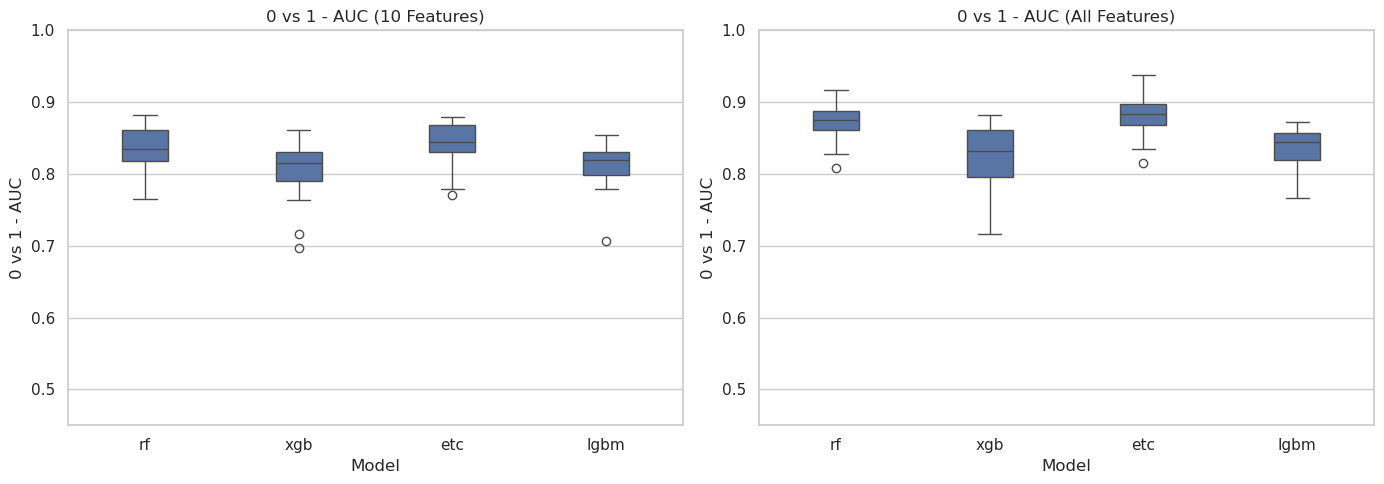

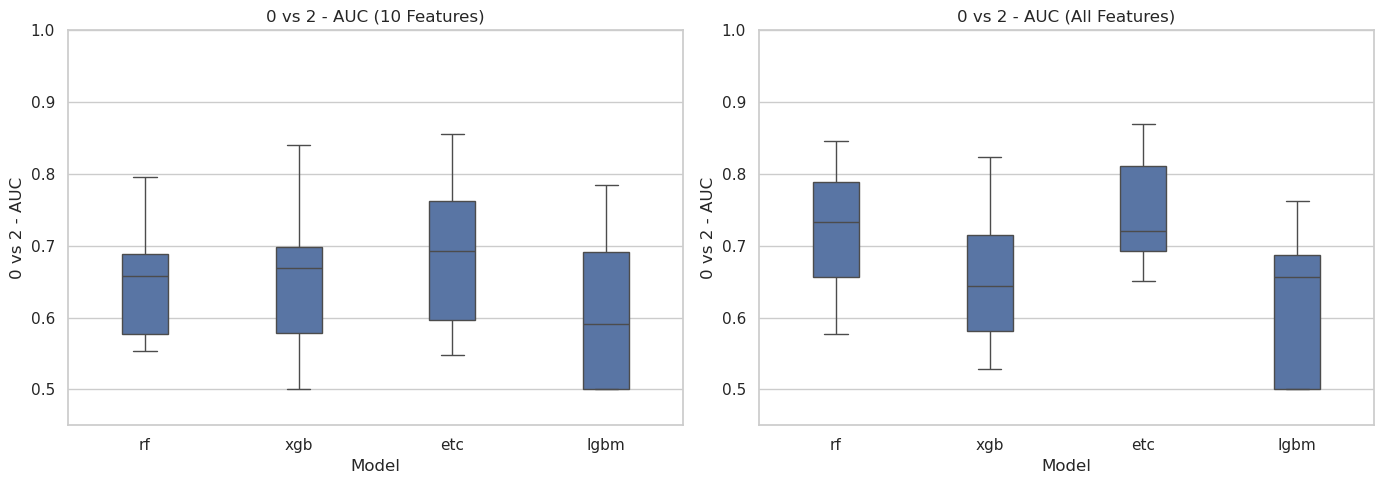

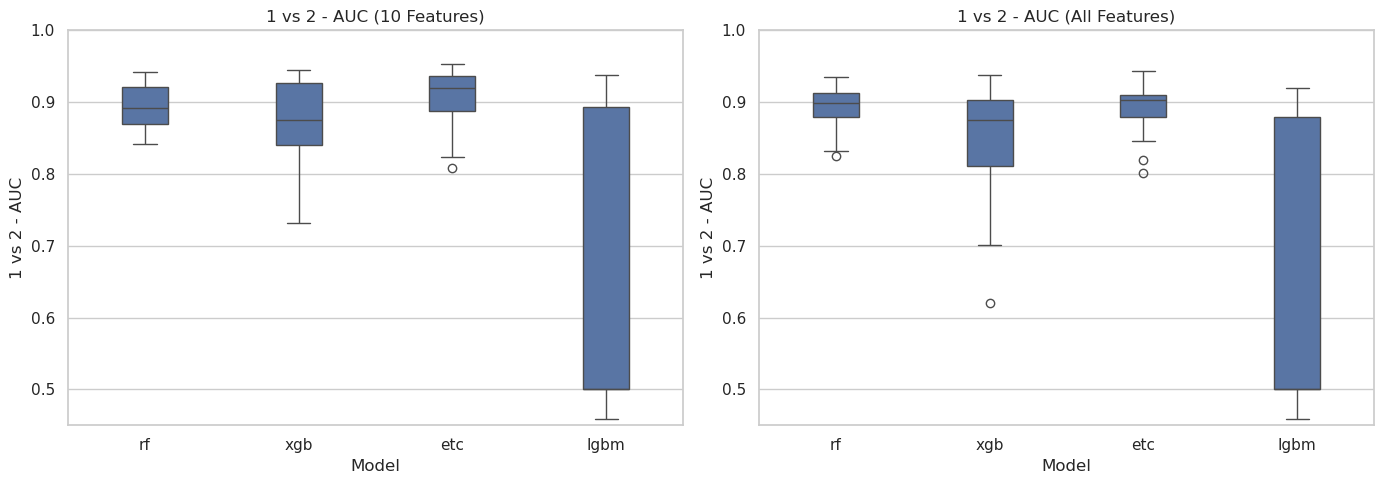

In [29]:
def classwise_auc_plot(file_path,x_axis):
    #read df
    df = pd.read_csv(file_path)
    
    # Convert "Features (k)" to numeric
    df["Features (k)"] = pd.to_numeric(df["Features (k)"], errors="coerce")
    
    # Separate data based on number of features
    df_10_features = df[df["Features (k)"] == 10]
    df_all_features = df[df["Features (k)"] != 10]  # Assuming "all features" means not 10
    
    # Define class-wise AUC columns
    class_auc_columns = [
        "0 vs Rest - AUC",
        "1 vs Rest - AUC",
        "2 vs Rest - AUC",
        "0 vs 1 - AUC",
        "0 vs 2 - AUC",
        "1 vs 2 - AUC"
    ]
    
    # Set up plotting style
    sns.set_theme(style="whitegrid")

    y_max=1
    y_min=0.45
    
    # --- PLOT CLASS-WISE AUCs ---
    for col in class_auc_columns:
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        
        # Plot for 10 features
        sns.boxplot(data=df_10_features, x=x_axis, y=col, ax=axes[0], width=0.3)
        axes[0].set_title(f"{col} (10 Features)")
        axes[0].set_ylim(y_min, y_max)
        # Plot for all features
        sns.boxplot(data=df_all_features, x=x_axis, y=col, ax=axes[1],width=0.3)
        axes[1].set_title(f"{col} (All Features)")
        axes[1].set_ylim(y_min, y_max)
    
        # Adjust layout and save the figure
        plt.tight_layout()
        filename = col.replace(" ", "_").replace("-", "").replace("/", "_") + "_Comparison.png"
        
        save_dir="results/plots_images"
        filepath=os.path.join(save_dir, filename)
        if not os.path.exists(filepath):
            plt.savefig(filepath)
  
        
        plt.show()
classwise_auc_plot("results/synthetic.csv","Model")

# bar graphs between Macro AUC vs models for 10 and all features

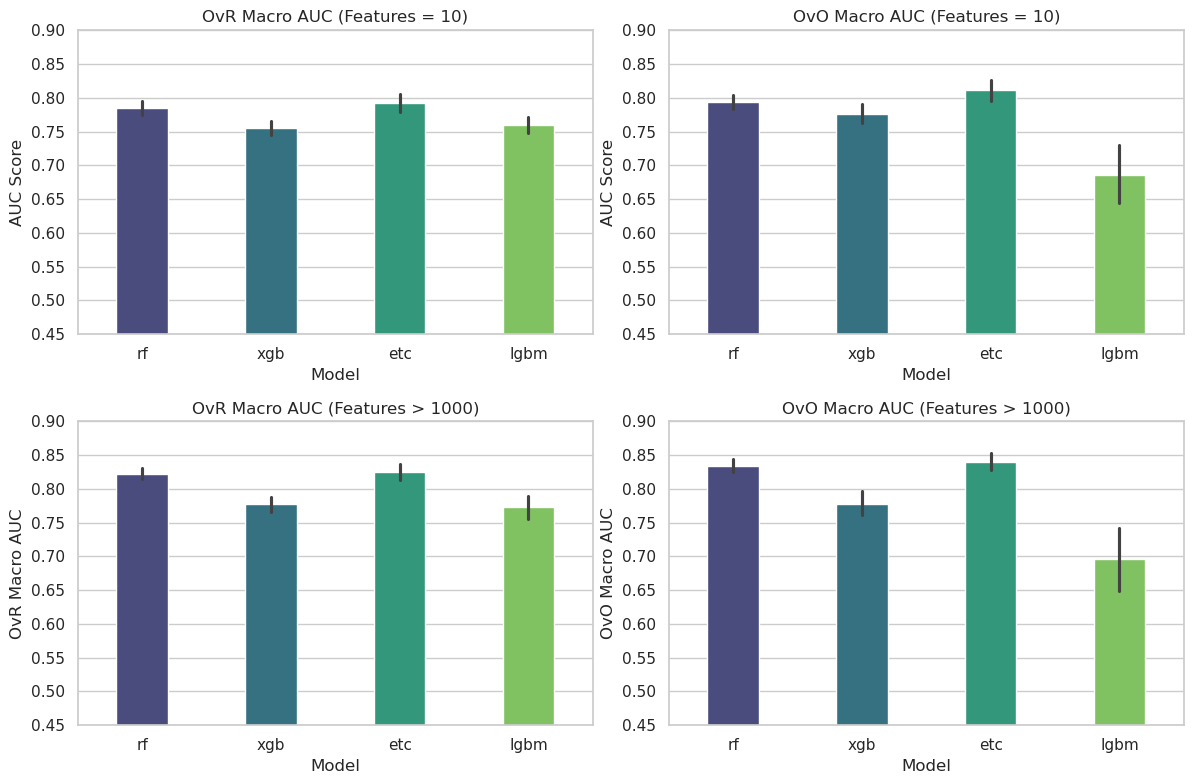

In [30]:
df = pd.read_csv("results/synthetic.csv")

# Plot performance metrics for different feature sets
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(12, 8), gridspec_kw={'width_ratios': [1, 1]})

for idx, k in enumerate([10, 1000]):
     
    if k == 10:
        subset_df = df[df["Features (k)"] == k]  # For Features = 10
    else:
        subset_df = df[df["Features (k)"] >= k]  # For Features > 1000

    # Define common y-axis range
    y_min = 0.45
    y_max = 0.9

   
    
    # OvR Macro AUC (Bar Chart)
    ax = axes[idx//2, idx%2]
    sns.barplot(x="Model", y="OvR Macro AUC", hue="Model", data=subset_df, palette="viridis", ax=axes[idx,0], width=0.4)
    axes[idx,0].set_title(f"OvR Macro AUC (Features {'=' if k == 10 else '>'} {k})")
    axes[idx,0].set_ylim(y_min, y_max)
    sns.barplot(x="Model", y="OvO Macro AUC", hue="Model", data=subset_df, palette="viridis", ax=axes[idx,1], width=0.4)
    axes[idx,1].set_title(f"OvO Macro AUC (Features {'=' if k == 10 else '>'} {k})")
    axes[idx,1].set_ylim(y_min, y_max)
    ax.set_xlabel("Model")
    ax.set_ylabel("AUC Score")
    if ax.get_legend() is not None:
        ax.get_legend().remove()
plt.subplots_adjust(hspace=0.4)
save_dir="results/plots_images"
filepath=os.path.join(save_dir, "syn_barplot_AUC_Comparison_10_vs_All_Features.png")
if not os.path.exists(filepath):
    plt.savefig(filepath)
plt.tight_layout()
plt.show()


    
  

# bar graph between MacroAUC and Macro F1 vs sampling strategies

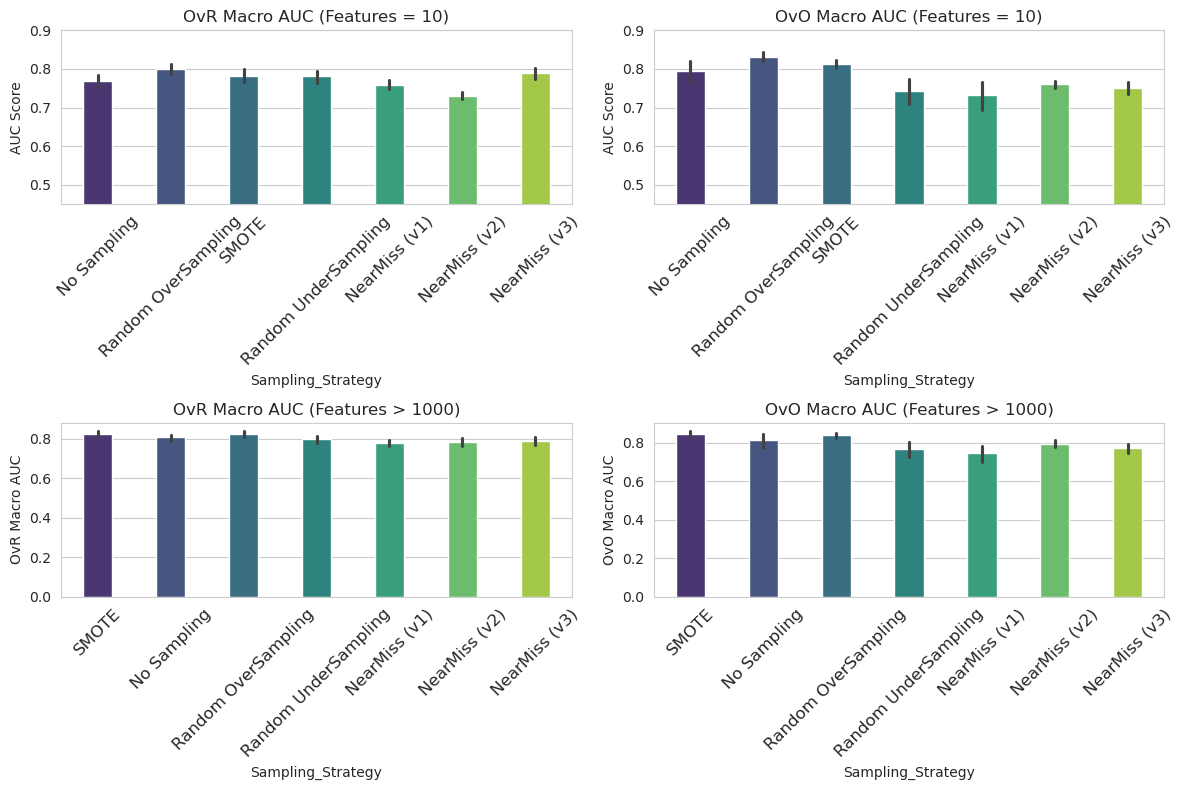

In [13]:
df = pd.read_csv("results/synthetic.csv")

# Plot performance metrics for different feature sets
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(12, 8), gridspec_kw={'width_ratios': [1, 1]})

for idx, k in enumerate([10, 1000]):
     
    if k == 10:
        subset_df = df[df["Features (k)"] == k]  # For Features = 10
    else:
        subset_df = df[df["Features (k)"] >=k]  # For Features > 1000

    # Define common y-axis range
    y_min = 0.45
    y_max = 0.9

   
    
    # OvR Macro AUC (Bar Chart)
    ax = axes[idx//2, idx%2]
    sns.barplot(x="Sampling_Strategy", y="OvR Macro AUC", hue="Sampling_Strategy", data=subset_df, palette="viridis", ax=axes[idx,0], width=0.4)
    axes[idx,0].set_title(f"OvR Macro AUC (Features {'=' if k == 10 else '>'} {k})")
    axes[idx, 0].tick_params(axis="x", rotation=45, labelsize=12)
    axes[idx,0].set_ylim(y_min, y_max)
    sns.barplot(x="Sampling_Strategy", y="OvO Macro AUC", hue="Sampling_Strategy", data=subset_df, palette="viridis", ax=axes[idx,1], width=0.4)
    axes[idx,1].set_title(f"OvO Macro AUC (Features {'=' if k == 10 else '>'} {k})")
    axes[idx, 1].tick_params(axis="x", rotation=45, labelsize=12)
    axes[idx,1].set_ylim(y_min, y_max)
    
    ax.set_xlabel("Sampling_Strategy")
    ax.set_ylabel("AUC Score")
    
    if ax.get_legend() is not None:
        ax.get_legend().remove()

#plt.xticks(rotation=45, fontsize=12)
plt.subplots_adjust(hspace=0.8)
save_dir="results/plots_images"
filepath=os.path.join(save_dir, "syn_barplot_sampling_vs_AUC.png")
if not os.path.exists(filepath):
    plt.savefig(filepath)
plt.tight_layout()
plt.show()


    
  